In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# base_csv_path = '/opt/ml/image-classification-level1-25/save/basic_resnet/20210826_173324_result.csv' #resnet 기본 40epoch 66%, 0.585 정도 나옴
# base_csv_path = '/opt/ml/image-classification-level1-25/save/last_single/20210826_231731_result.csv' # simple albu + resnet 21+3epoch 75.75% 0.675
# base_csv_path = '/opt/ml/image-classification-level1-25/save/last_single/20210827_003712_result.csv' # simple albu + resnet 21+3epoch + centercrop 77.5% 0.695
base_csv_path = '/opt/ml/image-classification-level1-25/save/albu resnet/20210827_101341_result.csv' # random albu + resnet 40epoch + centercrop 77.1% 0.707
cur_csv_path = '/opt/ml/image-classification-level1-25/save/basic_resnet/20210826_173324_result.csv'

(-1.0, 18.0)

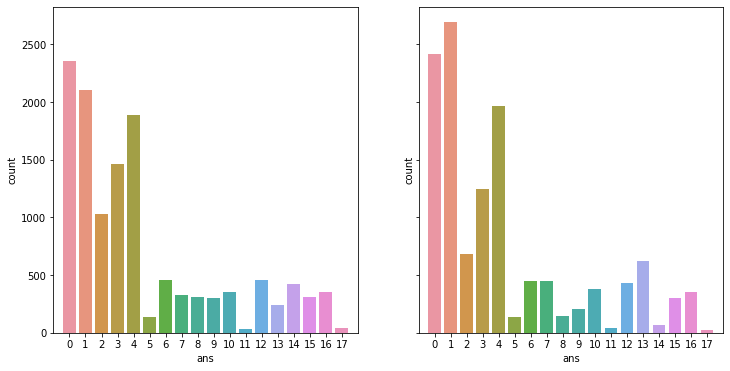

In [13]:
base_df = pd.read_csv(base_csv_path)
cur_df = pd.read_csv(cur_csv_path)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))
sns.countplot(x='ans', data=base_df, ax=axes[0]).set_xlim(-1,18)
sns.countplot(x='ans', data=cur_df, ax=axes[1]).set_xlim(-1,18)

(-1.0, 18.0)

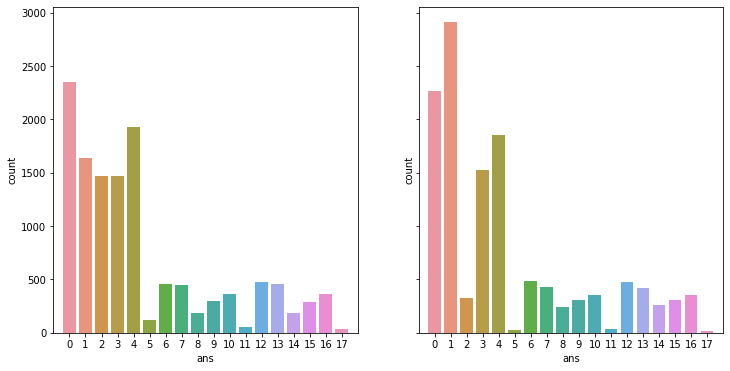

In [5]:
base_df = pd.read_csv(base_csv_path)
cur_df = pd.read_csv(cur_csv_path)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))
sns.countplot(x='ans', data=base_df, ax=axes[0]).set_xlim(-1,18)
sns.countplot(x='ans', data=cur_df, ax=axes[1]).set_xlim(-1,18)